# Exploring listings.csv.gz

#### Trupti Kolvekar

In [72]:
import pandas as pd

#  London Detailed Listings data
property_df = pd.read_csv('data/csv/airbnb_datasets/airbnb_files_raw_uncleansed/listings.csv.gz', compression='gzip', header=0, sep=',')

# Modify the display settings to show all columns
pd.set_option('display.max_columns', None)

# Print the DataFrame
print(property_df.head(5))

                   id                                      listing_url  \
0  714569379355913481  https://www.airbnb.com/rooms/714569379355913481   
1  808038970516277767  https://www.airbnb.com/rooms/808038970516277767   
2  822557738577472503  https://www.airbnb.com/rooms/822557738577472503   
3             3518856             https://www.airbnb.com/rooms/3518856   
4             4876550             https://www.airbnb.com/rooms/4876550   

        scrape_id last_scraped       source  \
0  20230314070633   2023-03-14  city scrape   
1  20230314070633   2023-03-14  city scrape   
2  20230314070633   2023-03-14  city scrape   
3  20230314070633   2023-03-14  city scrape   
4  20230314070633   2023-03-14  city scrape   

                                                name  \
0            Lovely private bedroom in Muswell Hill.   
1                       Studio Flat  Franklin London   
2   PropertyPlug - 2Bed Flat in Edgware SmartTV WiFi   
3                   Wimbledon Double Bedroom Ens

In [73]:
selected_columns = ['id', 'host_id', 'last_scraped', 'neighbourhood_cleansed',
                    'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds',
                    'price', 'minimum_nights', 'maximum_nights', 'has_availability',
                    'number_of_reviews', 'review_scores_rating', 'review_scores_location',
                    'calculated_host_listings_count']

selected_df = property_df[selected_columns]


# Display the count of NaN values for each column
nan_counts = selected_df.isnull().sum(axis=0)
print(nan_counts)

id                                    0
host_id                               0
last_scraped                          0
neighbourhood_cleansed                0
property_type                         0
room_type                             0
accommodates                          0
bedrooms                           3473
beds                               1106
price                                 0
minimum_nights                        0
maximum_nights                        0
has_availability                      0
number_of_reviews                     0
review_scores_rating              18693
review_scores_location            19676
calculated_host_listings_count        0
dtype: int64


In [74]:
selected_df = property_df[selected_columns].dropna(subset=['beds', 'bedrooms'])

In [75]:
df2 = pd.read_csv('C:\\Users\\Trudy\\Desktop\\march_crime_qcd.csv')
df2.head(5)

,crime_id,longitude,latitude,lsoa_name,crime_type,last_outcome_category,matched_neighbourhood
0,e15edf274ff197dd46677c8a1bd5af07730eb988f5b984...,0.138830,51.583433,barking_and_dagenham,burglary,under_investigation,barking_and_dagenham
1,eb710f5ac589248ff3bfbafa4b5bb88df3a7fe67004e14...,0.138830,51.583433,barking_and_dagenham,drugs,under_investigation,barking_and_dagenham
2,ca903844e1dfc42c822b450586d2acdc543fc10ca22e86...,0.140576,51.583419,barking_and_dagenham,drugs,under_investigation,barking_and_dagenham
3,c13691eb4c3fab1b28b5d9f95ad7df1b4be3311231d98e...,0.136416,51.584898,barking_and_dagenham,drugs,local_resolution,barking_and_dagenham
4,4a02b4e97ebdb1948e5cb4ff47ecca5ff721e029ce75f0...,0.136416,51.584898,barking_and_dagenham,drugs,local_resolution,barking_and_dagenham


In [76]:
selected_df['neighbourhood_cleansed'] = selected_df['neighbourhood_cleansed'].str.lower().str.replace(' ', '_')

In [77]:
neighbourhood_counts = selected_df['neighbourhood_cleansed'].value_counts()
print(neighbourhood_counts)

westminster               7844
tower_hamlets             5767
hackney                   5215
camden                    4571
kensington_and_chelsea    4429
southwark                 4145
lambeth                   4006
islington                 3939
wandsworth                3577
hammersmith_and_fulham    3060
brent                     2143
lewisham                  2100
haringey                  1924
newham                    1842
ealing                    1810
barnet                    1634
greenwich                 1610
waltham_forest            1368
merton                    1179
croydon                   1164
richmond_upon_thames      1051
hounslow                  1012
enfield                    665
hillingdon                 657
redbridge                  657
bromley                    626
kingston_upon_thames       542
barking_and_dagenham       453
harrow                     418
bexley                     395
city_of_london             384
havering                   329
sutton  

In [8]:
from datetime import datetime
last_scraped_column = selected_df['last_scraped']
last_scraped_dates = pd.to_datetime(last_scraped_column)
unique_dates = last_scraped_dates.dt.date.unique()
for date in unique_dates:
    print(date)

2023-03-14
2023-03-15
2023-03-16
2023-03-29


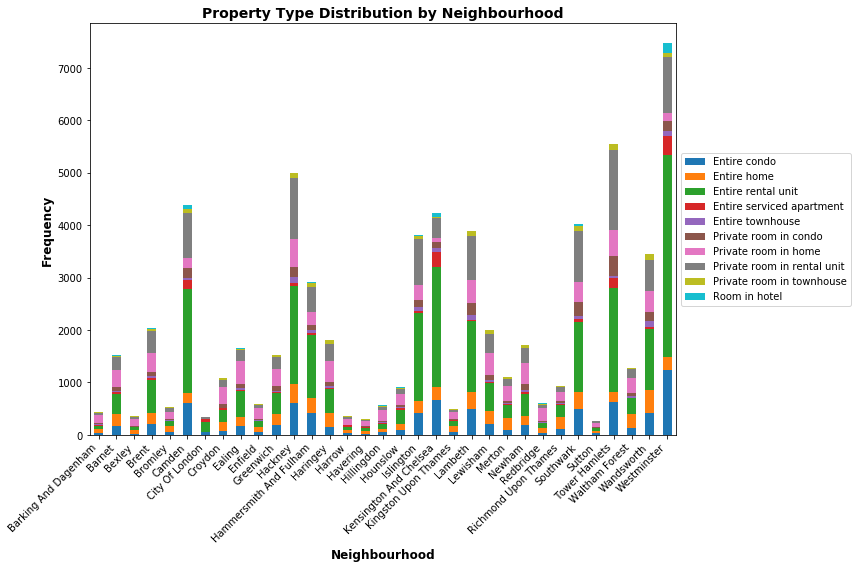

In [78]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'neighbourhood_cleansed' and 'property_type' and count the occurrences
grouped_df = selected_df.groupby(['neighbourhood_cleansed', 'property_type']).size().unstack()

# Filter property types with count less than 100
filtered_df = grouped_df.loc[:, grouped_df.ge(100).any()]

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the stacked bar chart
filtered_df.plot(kind='bar', stacked=True, ax=ax)

# Set the title and labels
neighbourhood_cleaned_labels = [label.replace('_', ' ').title() for label in filtered_df.index]
ax.set_title('Property Type Distribution by Neighbourhood', fontweight='bold', fontsize=14)
ax.set_xlabel('Neighbourhood', fontweight='bold', fontsize=12)
ax.set_ylabel('Frequency', fontweight='bold', fontsize=12)

# Set the x-axis tick labels and rotation
ax.set_xticklabels(neighbourhood_cleaned_labels, rotation=45, ha='right')

# Move the legend to the right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the spacing between the bars
plt.tight_layout()

# Display the chart
plt.show()


In [79]:
selected_df['property_type'] = selected_df['property_type'].str.replace(' ', '_').str.lower()
selected_df['rental_type'] = selected_df['property_type'].apply(lambda x: 'entire_property' if 'entire' in x else 'private_room')


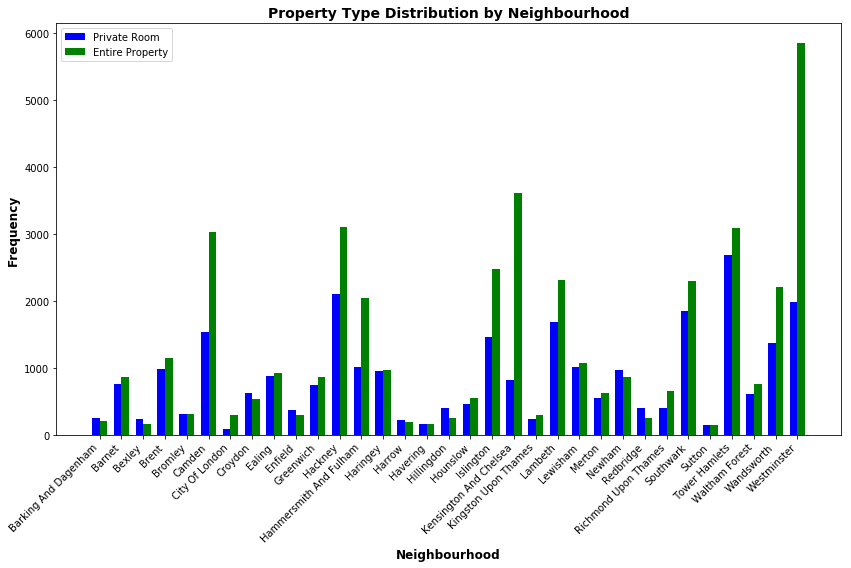

In [65]:
import numpy as np

# Group the DataFrame by 'neighbourhood_cleansed' and 'rental_type' and count the occurrences
grouped_df = selected_df.groupby(['neighbourhood_cleansed', 'rental_type']).size().unstack()

# Filter rental types with count less than 100
filtered_df = grouped_df.loc[:, grouped_df.ge(100).any()]

# Reset index to make 'neighbourhood_cleansed' a column
filtered_df = filtered_df.reset_index()

# Get the data for the plot
neighbourhoods = [label.replace('_', ' ').title() for label in filtered_df['neighbourhood_cleansed']]
private_room_counts = filtered_df['private_room']
entire_property_counts = filtered_df['entire_property']

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(neighbourhoods))
r2 = [x + bar_width for x in r1]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the bars for private room counts
ax.bar(r1, private_room_counts, color='b', width=bar_width, label='Private Room')

# Plot the bars for entire property counts
ax.bar(r2, entire_property_counts, color='g', width=bar_width, label='Entire Property')

# Set the title and labels
ax.set_title('Property Type Distribution by Neighbourhood', fontweight='bold', fontsize=14)
ax.set_xlabel('Neighbourhood', fontweight='bold', fontsize=12)
ax.set_ylabel('Frequency', fontweight='bold', fontsize=12)

# Set the x-axis tick labels and rotation
ax.set_xticks(r1 + bar_width / 2)
ax.set_xticklabels(neighbourhoods, rotation=45, ha='right')

# Add a legend
ax.legend()

# Adjust the spacing between the bars
plt.tight_layout()

# Display the chart
plt.show()


In [41]:
# Filter the DataFrame for private rooms
private_rooms_df = selected_df[selected_df['rental_type'] == 'private_room']

# Group the private rooms DataFrame by 'neighbourhood_cleansed' and calculate the statistics
grouped_stats = private_rooms_df.groupby('neighbourhood_cleansed')['price'].agg(['max', 'min', 'mean', 'count'])

# Print the table
print(grouped_stats)


                            max   min        mean  count
neighbourhood_cleansed                                  
barking_and_dagenham     2528.0  10.0   68.226721    247
barnet                   8000.0  15.0  119.381201    766
bexley                   2834.0   8.0   74.306034    232
brent                    7693.0  15.0  211.412121    990
bromley                  1214.0  10.0   66.576923    312
camden                   8888.0  14.0  103.381076   1543
city_of_london           2399.0  19.0  208.024691     81
croydon                  2332.0   7.0   61.357711    629
ealing                   2000.0   8.0   72.023837    881
enfield                  3343.0  15.0   73.733333    375
greenwich                3550.0  10.0   68.847091    739
hackney                  1500.0   1.0   60.076267   2111
hammersmith_and_fulham   5675.0  15.0   91.093229   1019
haringey                 8000.0  11.0  147.000000    951
harrow                   2528.0  14.0   65.574661    221
havering                 4550.0

In [66]:
import pandas as pd
import numpy as np

# Filter the DataFrame for private rooms
private_rooms_df = selected_df[selected_df['rental_type'] == 'private_room']

# Calculate the mean, standard deviation, and threshold for each neighborhood
grouped_neighborhoods = private_rooms_df.groupby('neighbourhood_cleansed')
neighbourhood_stats = grouped_neighborhoods['price'].agg(['mean', 'std'])

# Calculate the lower and upper bounds for the 3 standard deviation threshold
neighbourhood_stats['lower_bound'] = neighbourhood_stats['mean'] - (3 * neighbourhood_stats['std'])
neighbourhood_stats['upper_bound'] = neighbourhood_stats['mean'] + (3 * neighbourhood_stats['std'])

# Apply the quality control by filtering out prices outside the threshold
filtered_private_rooms_df = private_rooms_df.merge(neighbourhood_stats[['lower_bound', 'upper_bound']], 
                                                   left_on='neighbourhood_cleansed', 
                                                   right_index=True)
filtered_private_rooms_df = filtered_private_rooms_df[(filtered_private_rooms_df['price'] >= filtered_private_rooms_df['lower_bound']) &
                                                      (filtered_private_rooms_df['price'] <= filtered_private_rooms_df['upper_bound'])]

# Calculate the mean, minimum, maximum, and count of prices for each neighborhood after QC
grouped_neighborhoods_qc = filtered_private_rooms_df.groupby('neighbourhood_cleansed')
neighbourhood_stats_qc = grouped_neighborhoods_qc['price'].agg(['mean', 'min', 'max', 'count'])

# Print the table
print(neighbourhood_stats_qc)


                              mean   min     max  count
neighbourhood_cleansed                                 
barking_and_dagenham     50.302041  10.0   166.0    245
barnet                   67.844086  15.0  1008.0    744
bexley                   50.317391   8.0   499.0    230
brent                   203.847321  15.0  1570.0    989
bromley                  58.601942  10.0   300.0    309
camden                   86.333333  14.0  1000.0   1539
city_of_london          180.637500  19.0   519.0     80
croydon                  53.130990   7.0   360.0    626
ealing                   59.291139   8.0   400.0    869
enfield                  62.656836  15.0   500.0    373
greenwich                57.679348  10.0   450.0    736
hackney                  53.807877   1.0   264.0   2082
hammersmith_and_fulham   73.084661  15.0   545.0   1004
haringey                 75.401737  11.0  1570.0    921
harrow                   54.381818  14.0   220.0    220
havering                 58.151515  18.0   900.0

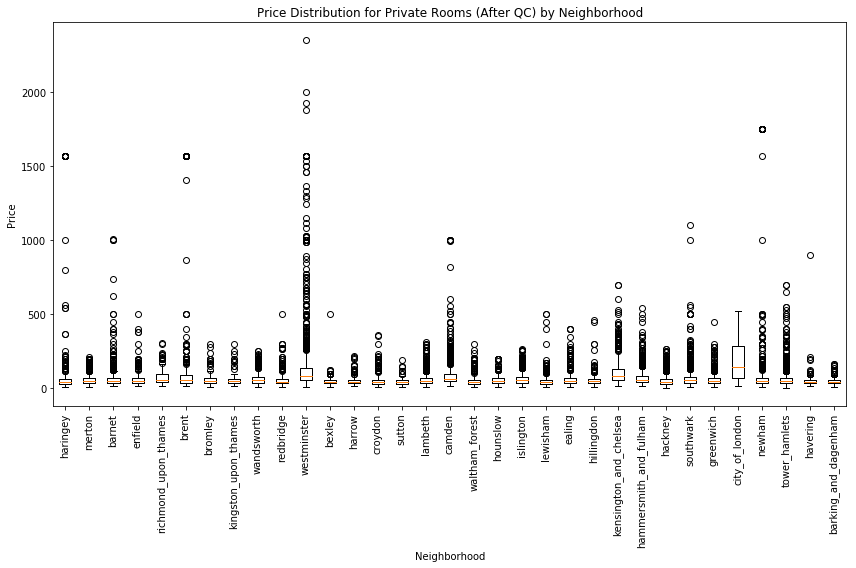

In [49]:
import matplotlib.pyplot as plt

# Plot box plots for each neighborhood
plt.figure(figsize=(12, 8))  # Set the figure size
plt.boxplot([filtered_private_rooms_df[filtered_private_rooms_df['neighbourhood_cleansed'] == neighborhood]['price']
             for neighborhood in filtered_private_rooms_df['neighbourhood_cleansed'].unique()],
            labels=filtered_private_rooms_df['neighbourhood_cleansed'].unique())

# Set the title and labels
plt.title('Price Distribution for Private Rooms (After QC) by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.tight_layout()
plt.show()


In [67]:
# Filter the DataFrame for entire property
entire_property_df = selected_df[selected_df['rental_type'] == 'entire_property']

# Group the private rooms DataFrame by 'neighbourhood_cleansed' and calculate the statistics
grouped_stats = entire_property_df.groupby('neighbourhood_cleansed')['price'].agg(['max', 'min', 'mean', 'count'])

# Print the table
print(grouped_stats)

                            max   min        mean  count
neighbourhood_cleansed                                  
barking_and_dagenham      470.0  29.0  142.980583    206
barnet                   5799.0   8.0  177.455069    868
bexley                    999.0  35.0  143.214724    163
brent                    5500.0  30.0  178.169991   1153
bromley                  1089.0  14.0  143.964968    314
camden                   9999.0  25.0  249.082893   3028
city_of_london           2936.0  72.0  218.141914    303
croydon                  1400.0  24.0  126.452336    535
ealing                   4429.0   8.0  169.368138    929
enfield                  1550.0  27.0  152.755172    290
greenwich                2990.0  24.0  164.360505    871
hackney                 10000.0  20.0  166.307668   3104
hammersmith_and_fulham   5139.0  25.0  223.013229   2041
haringey                 2142.0  24.0  161.254882    973
harrow                   1800.0  25.0  156.918782    197
havering                 2500.0

In [54]:
# Calculate the mean, standard deviation, and threshold for each neighborhood
grouped_neighborhoods = entire_property_df.groupby('neighbourhood_cleansed')
neighbourhood_stats = grouped_neighborhoods['price'].agg(['mean', 'std'])

# Calculate the lower and upper bounds for the 3 standard deviation threshold
neighbourhood_stats['lower_bound'] = neighbourhood_stats['mean'] - (3 * neighbourhood_stats['std'])
neighbourhood_stats['upper_bound'] = neighbourhood_stats['mean'] + (3 * neighbourhood_stats['std'])

# Apply the quality control by filtering out prices outside the threshold
filtered_entire_property_df = entire_property_df.merge(neighbourhood_stats[['lower_bound', 'upper_bound']], 
                                                   left_on='neighbourhood_cleansed', 
                                                   right_index=True)
filtered_entire_property_df = filtered_entire_property_df[(filtered_entire_property_df['price'] >= filtered_entire_property_df['lower_bound']) &
                                                      (filtered_entire_property_df['price'] <= filtered_entire_property_df['upper_bound'])]

# Calculate the mean, minimum, maximum, and count of prices for each neighborhood after QC
grouped_neighborhoods_qc = filtered_entire_property_df.groupby('neighbourhood_cleansed')
neighbourhood_stats_qc = grouped_neighborhoods_qc['price'].agg(['mean', 'min', 'max', 'count'])

# Print the table
print(neighbourhood_stats_qc)

                              mean   min     max  count
neighbourhood_cleansed                                 
barking_and_dagenham    136.422886  29.0   349.0    201
barnet                  163.304751   8.0   900.0    863
bexley                  129.725000  35.0   500.0    160
brent                   165.364829  30.0   810.0   1143
bromley                 130.123377  14.0   528.0    308
camden                  210.878655  25.0  1413.0   2975
city_of_london          198.979866  72.0   808.0    298
croydon                 120.500000  24.0   400.0    530
ealing                  152.646739   8.0   799.0    920
enfield                 139.712281  27.0   440.0    285
greenwich               152.101045  24.0   600.0    861
hackney                 153.713128  20.0   880.0   3085
hammersmith_and_fulham  190.528707  25.0  1118.0   2003
haringey                142.019916  24.0   650.0    954
harrow                  144.174359  25.0   600.0    195
havering                167.567901  24.0   780.0

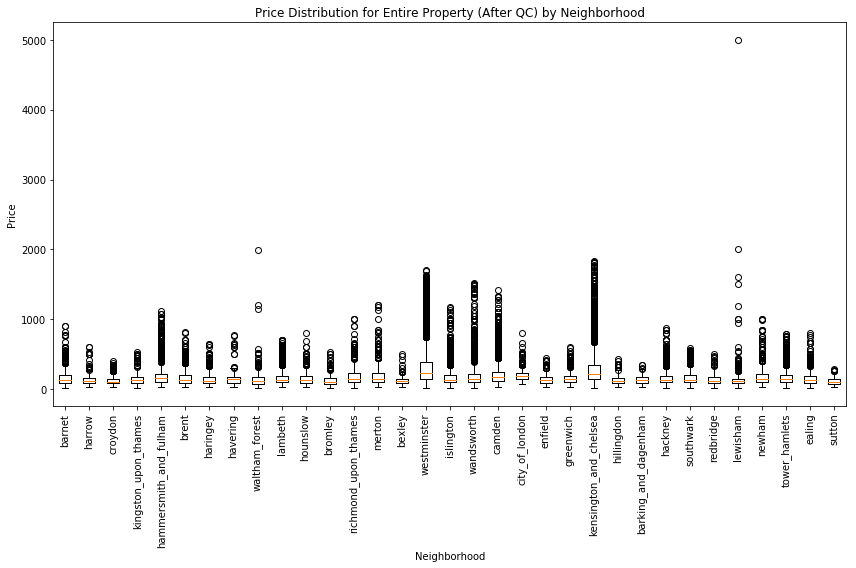

In [55]:
import matplotlib.pyplot as plt

# Plot box plots for each neighborhood
plt.figure(figsize=(12, 8))  # Set the figure size
plt.boxplot([filtered_entire_property_df[filtered_entire_property_df['neighbourhood_cleansed'] == neighborhood]['price']
             for neighborhood in filtered_entire_property_df['neighbourhood_cleansed'].unique()],
            labels=filtered_private_rooms_df['neighbourhood_cleansed'].unique())

# Set the title and labels
plt.title('Price Distribution for Entire Property (After QC) by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.tight_layout()
plt.show()

In [87]:
import pandas as pd
import numpy as np

# Select the required columns from selected_df
subset_df = selected_df[['neighbourhood_cleansed', 'rental_type', 'price']]

# Create a subset for private_room rental type
private_room_subset = subset_df[subset_df['rental_type'] == 'private_room']

# Create a subset for entire_property rental type
entire_property_subset = subset_df[subset_df['rental_type'] == 'entire_property']

# Count the occurrences of each rental type for each neighbourhood_cleansed in the private_room subset
private_room_counts = private_room_subset.groupby('neighbourhood_cleansed').size().reset_index(name='private_room_count')
print("Private Room Counts:")
print(private_room_counts)

# Count the occurrences of each rental type for each neighbourhood_cleansed in the entire_property subset
entire_property_counts = entire_property_subset.groupby('neighbourhood_cleansed').size().reset_index(name='entire_property_count')
print("Entire Property Counts:")
print(entire_property_counts)

# Calculate the mean and standard deviation of price for the private_room subset
private_room_subset['price'] = private_room_subset['price'].str.replace(',', '').str.replace('$', '').astype(float)
private_room_stats = private_room_subset.groupby('neighbourhood_cleansed')['price'].agg(['mean', 'std']).reset_index()
private_room_stats.columns = ['neighbourhood_cleansed', 'private_room_mean_price', 'private_room_std_price']
print("Private Room Stats:")
print(private_room_stats)

# Calculate mean and standard deviation of price for entire_property subset
entire_property_subset['price'] = entire_property_subset['price'].str.replace(',', '').str.replace('$', '').astype(float)
entire_property_stats = entire_property_subset.groupby('neighbourhood_cleansed')['price'].agg(['mean', 'std']).reset_index()
entire_property_stats.columns = ['neighbourhood_cleansed', 'entire_property_mean_price', 'entire_property_std_price']
print("Entire Property Stats:")
print(entire_property_stats)

# Count the number of crimes by matched_neighbourhood in df2
crime_counts = df2['matched_neighbourhood'].value_counts().reset_index()
crime_counts.columns = ['matched_neighbourhood', 'crime_count']
print("Crime Counts:")
print(crime_counts)

# Merge private room stats, entire property stats, and crime counts
merged_stats = private_room_stats.merge(entire_property_stats, on='neighbourhood_cleansed', how='outer')
merged_stats = merged_stats.merge(crime_counts, left_on='neighbourhood_cleansed', right_on='matched_neighbourhood', how='left')
merged_stats.drop(columns='matched_neighbourhood', inplace=True)
print("Merged Stats:")
print(merged_stats)


Private Room Counts:
    neighbourhood_cleansed  private_room_count
0     barking_and_dagenham                 247
1                   barnet                 766
2                   bexley                 232
3                    brent                 990
4                  bromley                 312
5                   camden                1543
6           city_of_london                  81
7                  croydon                 629
8                   ealing                 881
9                  enfield                 375
10               greenwich                 739
11                 hackney                2111
12  hammersmith_and_fulham                1019
13                haringey                 951
14                  harrow                 221
15                havering                 166
16              hillingdon                 404
17                hounslow                 458
18               islington                1459
19  kensington_and_chelsea             

C:\Users\Trudy\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Trudy\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


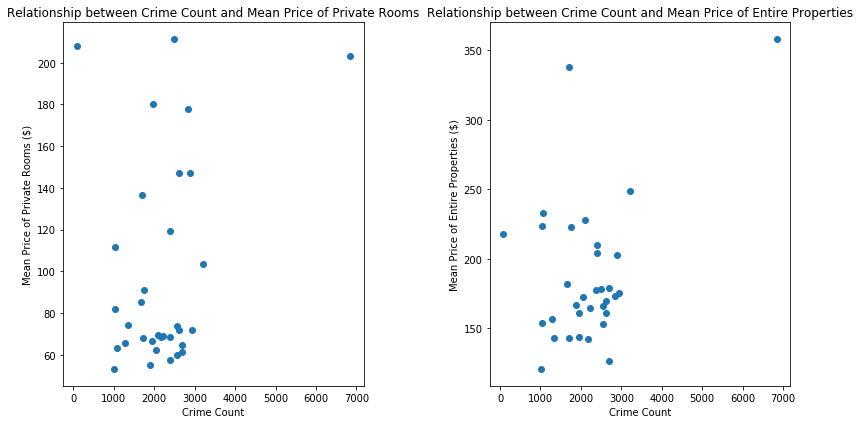

In [90]:
import matplotlib.pyplot as plt

# Data for scatter plots
crime_count = merged_stats['crime_count']
private_room_mean_prices = merged_stats['private_room_mean_price']
entire_property_mean_prices = merged_stats['entire_property_mean_price']

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Scatter plot for mean price of private rooms
axes[0].scatter(crime_count, private_room_mean_prices)
axes[0].set_xlabel('Crime Count')
axes[0].set_ylabel('Mean Price of Private Rooms ($)')
axes[0].set_title('Relationship between Crime Count and Mean Price of Private Rooms')

# Scatter plot for mean price of entire properties
axes[1].scatter(crime_count, entire_property_mean_prices)
axes[1].set_xlabel('Crime Count')
axes[1].set_ylabel('Mean Price of Entire Properties ($)')
axes[1].set_title('Relationship between Crime Count and Mean Price of Entire Properties')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()
